## Summative 1 - Analysing a dataset from kaggle through a semi automated pipeline

The dataset selected for this task can be found here https://www.kaggle.com/datasets/thedevastator/uk-mortgage-rates-thousands-of-mortgage-products, and it contains data on the mortgage products of the UK.

#### Getting started

In order to use this notebook a kaggle account along with your kaggle login name and key are required, the code will ask you to enter these when you download the data

These can be accessed in the account section of the kaggle website by clicking the create new api token button

In [1]:
!pip install opendatasets
!pip install django

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b30c63675c6fa07be1f01dd025a24a37c49c5d802851ef72335d2a286e0cf62b
  Stored in directory: /root/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 107.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# importing functions and packages
from summative_functions import *
%matplotlib inline

In [3]:
data = import_data("https://www.kaggle.com/datasets/thedevastator/uk-mortgage-rates-thousands-of-mortgage-products")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading uk-mortgage-rates-thousands-of-mortgage-products.zip to ./uk-mortgage-rates-thousands-of-mortgage-products
100%|██████████| 120k/120k [00:00<00:00, 16.8MB/s]



In [4]:
# viewing the top 5 rows
data.head()

,SKU,BANK_NAME,MTG_PRODUCT_SUBTITLE,MTG_PRODUCT_TYPE_RAW,MTG_PRODUCT_TYPE,MTG_PRODUCT_YEARS,MTG_INITIAL_RATE_PCT,MTG_APR_PCT,MTG_REVERT_RATE,MTG_FEES_TOTAL,MTG_INITIAL_RATE_MONTHS,SCAN_DATE,TID
index,,,,,,,,,,,,,
0,3739342,Foundation Home Loans,Remortgage,5 year fixed,fixed,25,7.69,7.7,7.24,630.0,60,2022-10-16 06:42:26,483184
1,3738960,Kensington Mortgages,Remortgage,2 year fixed,fixed,25,8.34,8.0,7.35,2347.0,24,2022-10-16 06:42:26,483185
2,3739028,Kensington Mortgages,Remortgage,2 year fixed,fixed,25,8.49,7.9,7.35,108.0,24,2022-10-16 06:42:26,483186
3,3738961,Kensington Mortgages,Remortgage,5 year fixed,fixed,25,8.94,8.6,7.35,2347.0,60,2022-10-16 06:42:26,483187
4,3739020,Kensington Mortgages,Remortgage,5 year fixed,fixed,25,9.09,8.6,7.55,108.0,60,2022-10-16 06:42:26,483188


In [5]:
# renaming the column heads
new_col_heads = ["Products SKU", "Bank", "Mortgage product subtitle", 
"Product type subtitle", "Product type", "Length of Mortgage", 
"Initial Rate","APR percentage", "Revert Rate", "Total Fees", "Initial Rate months", "Date scanned","ID KEY"]

# renaming the columns
data = clean_col_names(data, new_col_heads)

# viewing the header again to see the new column names
data.head()

,Products SKU,Bank,Mortgage product subtitle,Product type subtitle,Product type,Length of Mortgage,Initial Rate,APR percentage,Revert Rate,Total Fees,Initial Rate months,Date scanned,ID KEY
index,,,,,,,,,,,,,
0,3739342,Foundation Home Loans,Remortgage,5 year fixed,fixed,25,7.69,7.7,7.24,630.0,60,2022-10-16 06:42:26,483184
1,3738960,Kensington Mortgages,Remortgage,2 year fixed,fixed,25,8.34,8.0,7.35,2347.0,24,2022-10-16 06:42:26,483185
2,3739028,Kensington Mortgages,Remortgage,2 year fixed,fixed,25,8.49,7.9,7.35,108.0,24,2022-10-16 06:42:26,483186
3,3738961,Kensington Mortgages,Remortgage,5 year fixed,fixed,25,8.94,8.6,7.35,2347.0,60,2022-10-16 06:42:26,483187
4,3739020,Kensington Mortgages,Remortgage,5 year fixed,fixed,25,9.09,8.6,7.55,108.0,60,2022-10-16 06:42:26,483188


#### Summary analysis of metrics

The below set of charts look at the distributions of the continuos data and counts of the categorical data, they show which continuos variables have outliers and also which categorical variables have unevenly distributed categories

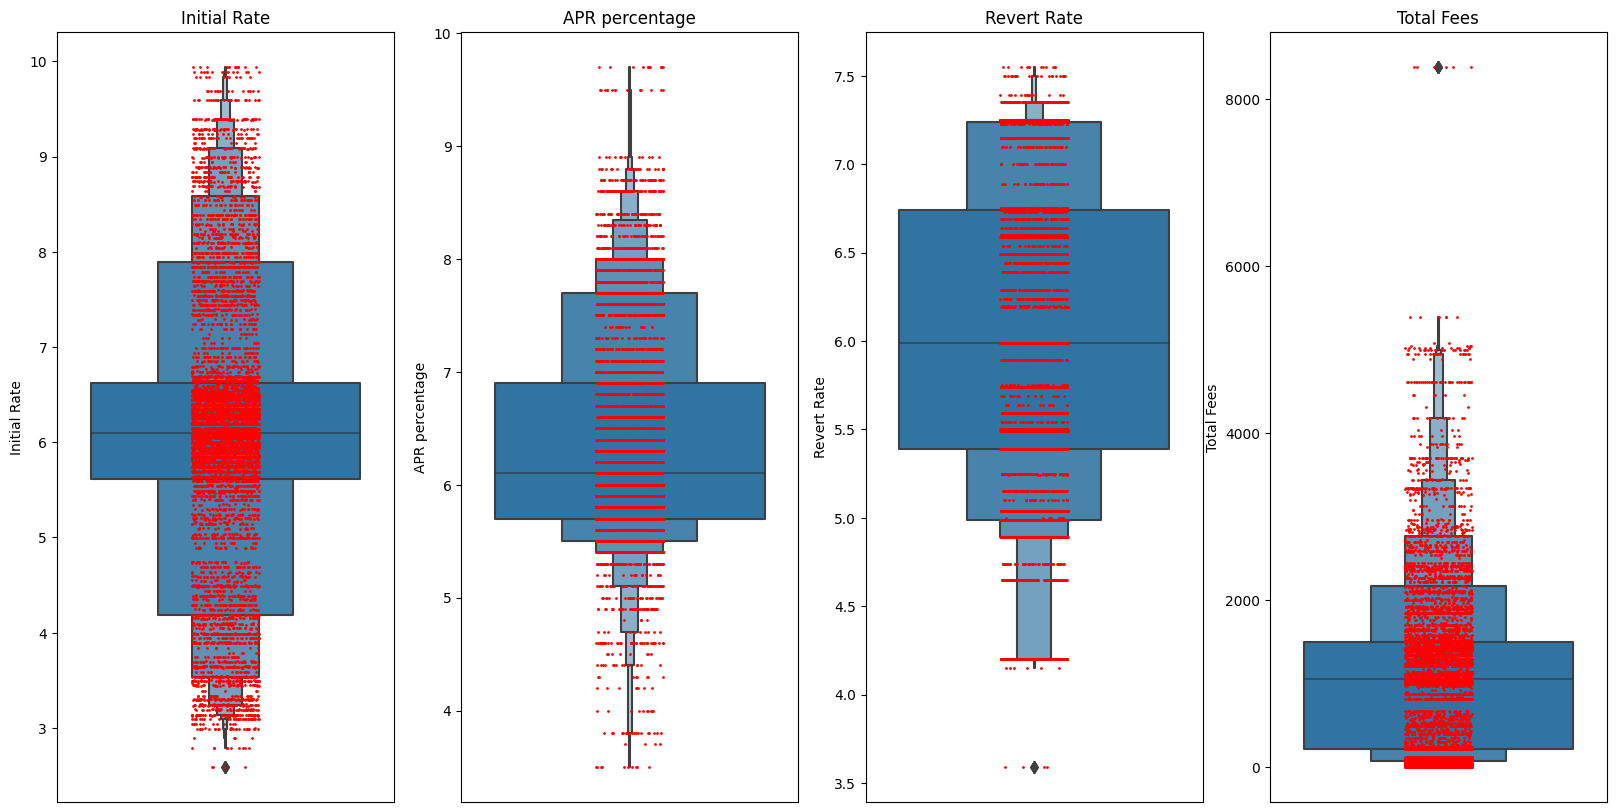

In [6]:
create_boxenplots(data,["Initial Rate",	"APR percentage", "Revert Rate", "Total Fees"])

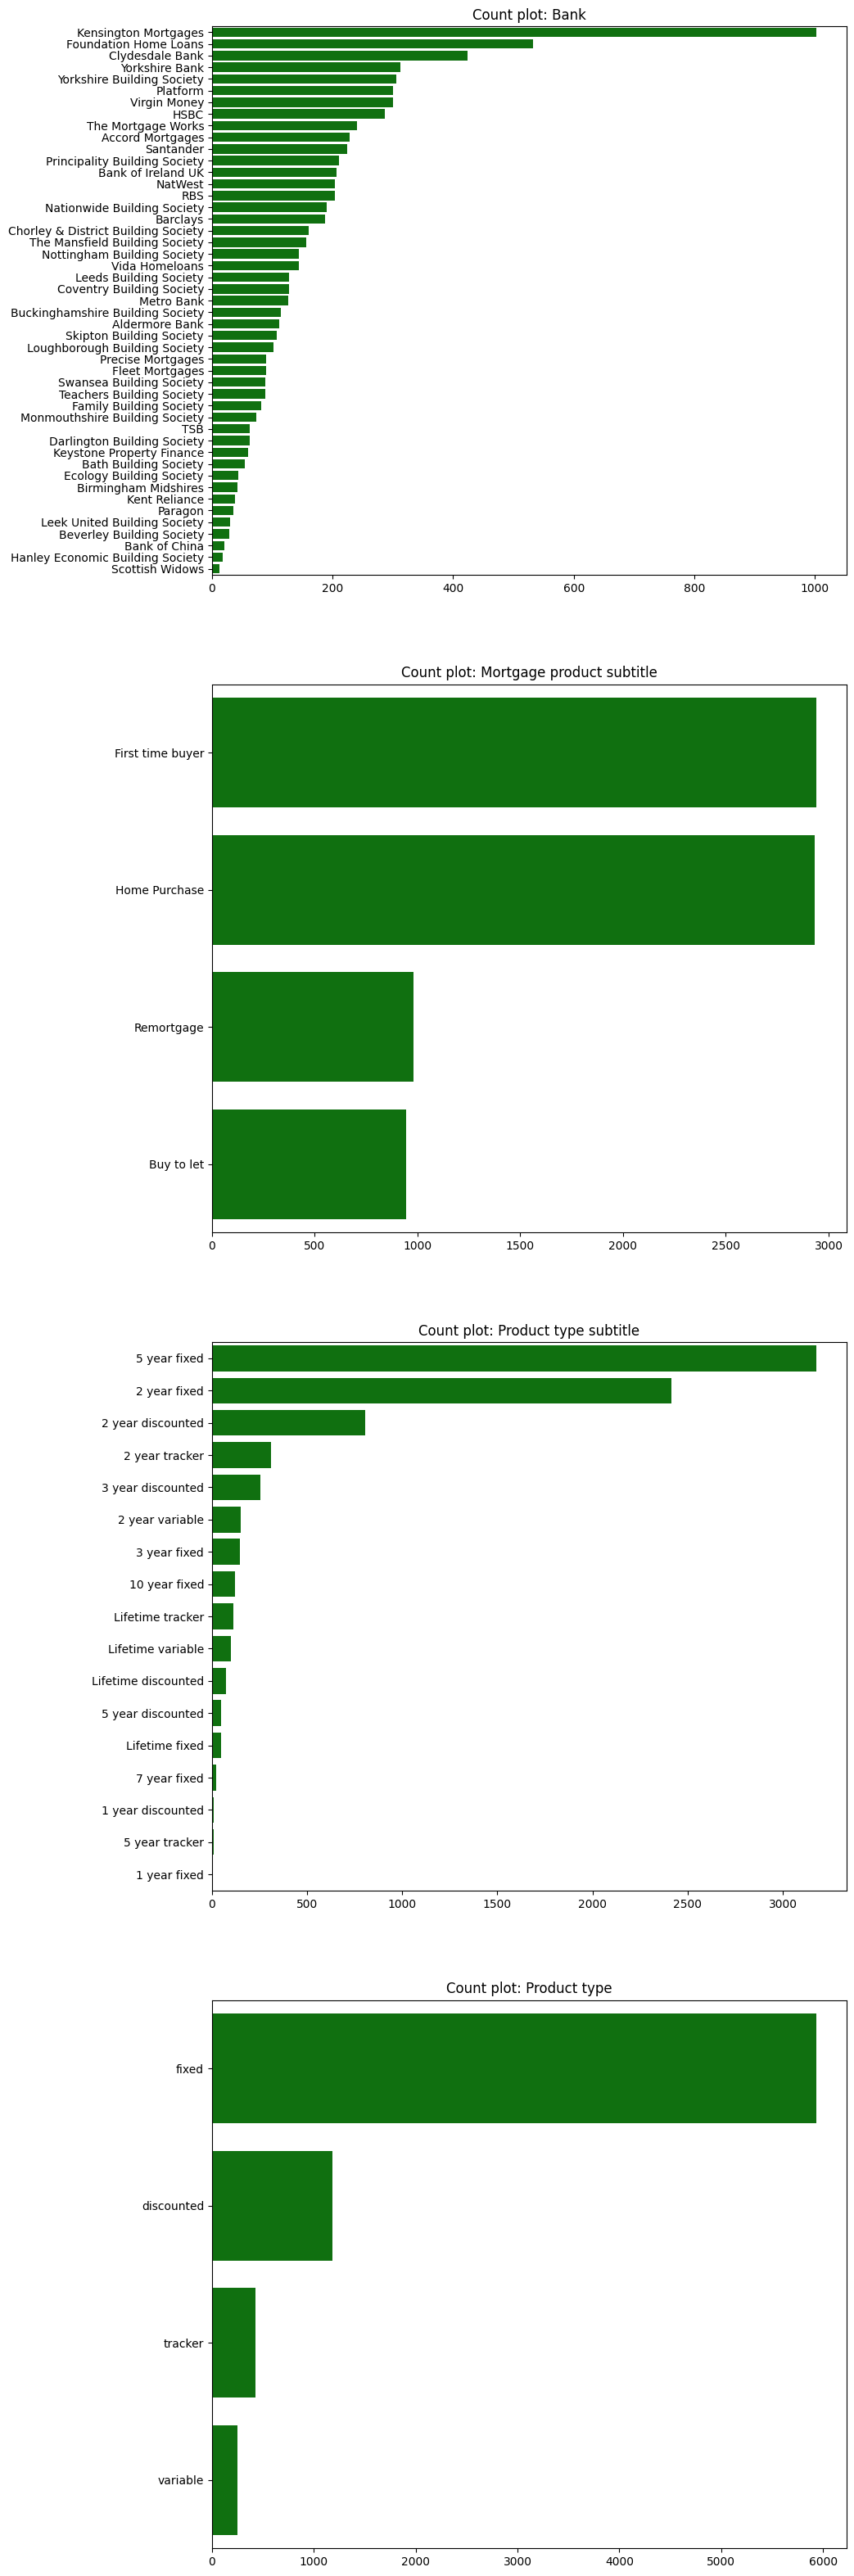

In [7]:
create_count_plots(data, ["Bank", "Mortgage product subtitle", "Product type subtitle",	"Product type"])

#### Scatter plots

The below plots show the relationships between differnent continous values with categorical values added in the hue to reveal groupings within the categorical data - this could then be used within machine learning algorithms when determining which varaibles to use 

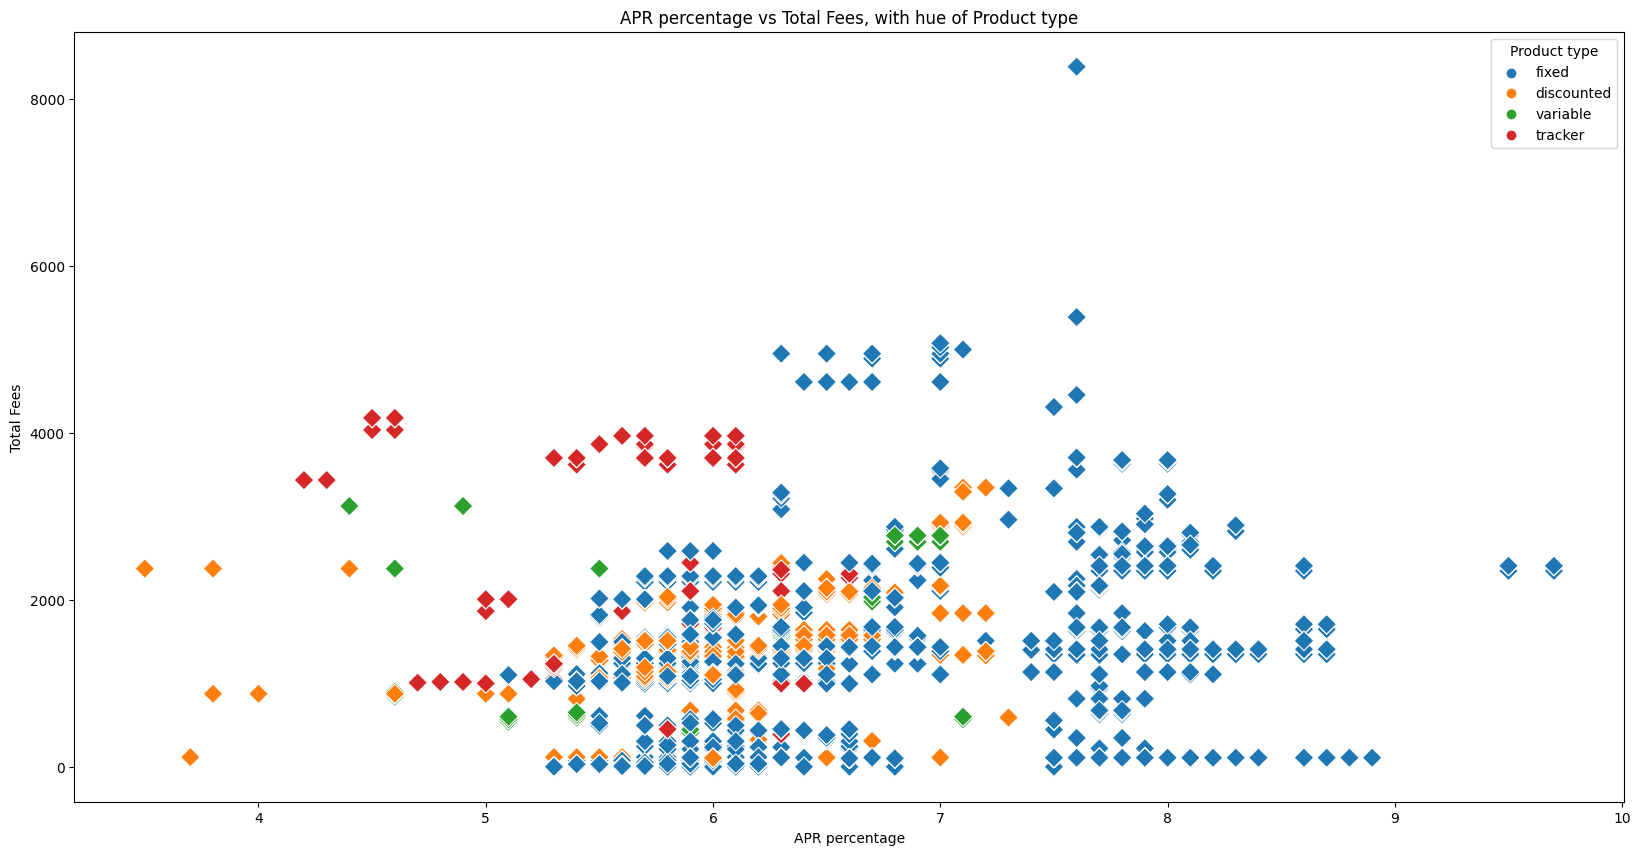

In [8]:
create_scatter_plots(data, "APR percentage", "Total Fees", "Product type")

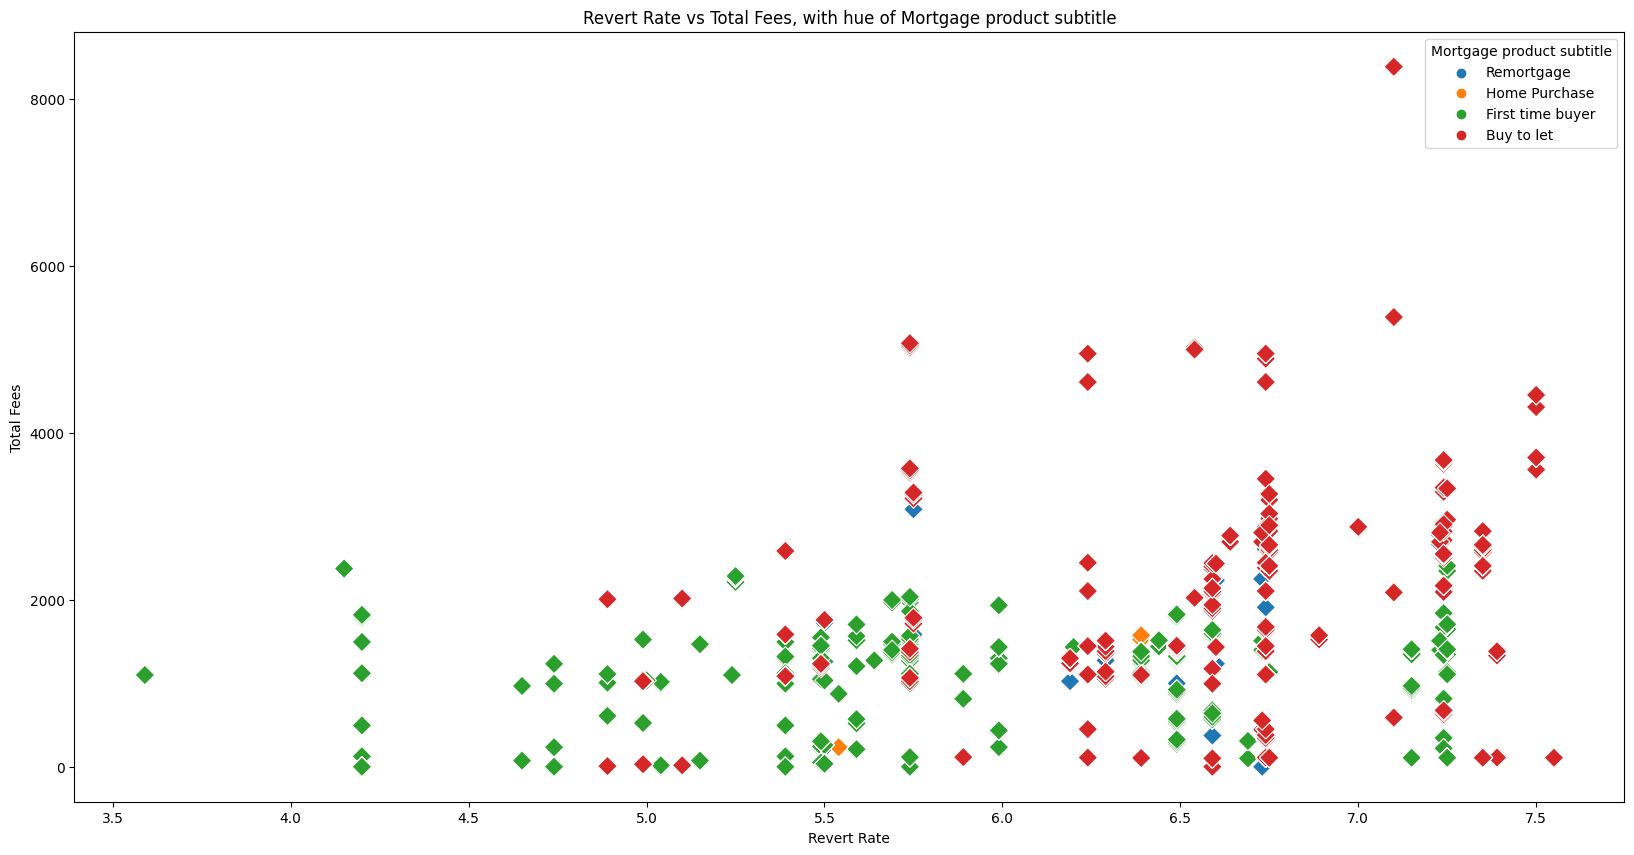

In [9]:
create_scatter_plots(data, "Revert Rate", "Total Fees", "Mortgage product subtitle")

In [10]:
help(import_data)

Help on function import_data in module summative_functions:

import_data(path)
    Function to import the dataset from kaggle, it only accepts strings and file paths from kaggle
    It then uses the opendatasets function to download the file into the local folder before then using 
    the get_folder_name function to get the name of the newly created folder, next it uses glob to extract the
    file name and finally the data is imported as a pandas dataframe which is returned to the user
    
    Parameters:
            path (str)- file path being read in
    Returns:
            data (pandas.Dataframe)- pandas dataframe of the data that was read in



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8bea6a1c-efac-4702-96b9-95face189bfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>